## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
sns.set()

Import Data

In [2]:
data = pd.read_csv('athlete_events.csv')
all_sports = data['Sport'].unique()
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
data['NOC'].unique(), data['NOC'].unique().size

(array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'ROU', 'EST', 'FRA',
        'MAR', 'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD',
        'RUS', 'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX',
        'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
        'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
        'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
        'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
        'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
        'SUI', 'BRA', 'FRG', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'ISV',
        'SRI', 'ARM', 'CIV', 'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM',
        'LAT', 'NIG', 'MLI', 'AFG', 'POL', 'CRC', 'PAN', 'GEO', 'SLO',
        'CRO', 'GUY', 'NZL', 'POR', 'PAR', 'ANG', 'VEN', 'COL', 'BAN',
        'PER', 'ESA', 'PUR', 'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY',
        'TCH', 'LUX', 'MTN', 'CZE', 'SKN', 'TTO', 'DOM', 'VIN', 'JAM',
      

In [4]:
country_code = ['USA'] #Set country code to visualize its data
def country_code_mapping(arr):
    x = []
    for item in arr:
        x.append(country_code.__contains__(item))
    return pd.Series(x)

In [5]:
columns = data.columns.values
columns

array(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype=object)

In [6]:
data['Sport'].unique() #Print all the sports in olymics

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [7]:
data[data['Season'] == 'Summer']['Sport'].unique() # print all sports in summer olympics

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [8]:
data[data['Season'] == 'Winter']['Sport'].unique() #Print all the Winter sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

## Visualize male and Female data

In [9]:
data_male = data[data['Sex'] == 'M']
data_male_medals = data_male.dropna(subset=['Medal'])
data_female = data[data['Sex'] == 'F]'
data_female_medals = data_female.dropna(subset=['Medal')
]
assert(data_male.size + data_female.size == data.size)

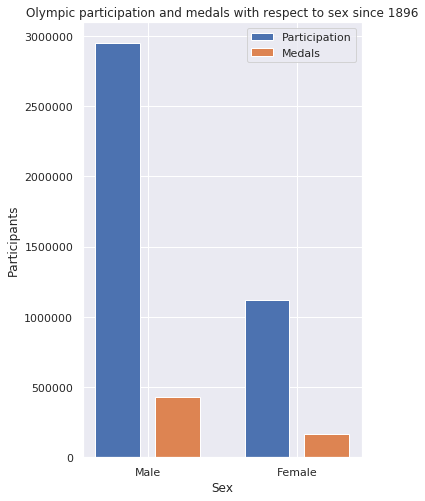

In [10]:
fig = plt.figure(figsize = (5, 8))
X = ['Male', 'Female']
X_axis = np.arange(2)
plt.bar(X_axis-0.2, [data_male.size, data_female.size], width=0.3, label='Participation')
plt.bar(X_axis+0.2, [data_male_medals.size, data_female_medals.size], width=0.3, label='Medals')
plt.xticks(X_axis, X)
plt.xlabel('Sex')
plt.ylabel('Participants')
plt.title("Olympic participation and medals with respect to sex since 1896")
plt.legend()
plt.show()

## Visualize participation of a country in various sports

In [11]:
data_country = data.loc[country_code_mapping(data['NOC'])].reset_index(drop=True)
data_country.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
2,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
3,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
4,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN


In [12]:
print('Total participants in various sports for the country')
country_sport_count = data_country['Sport'].value_counts()

Total participants in various sports for the country


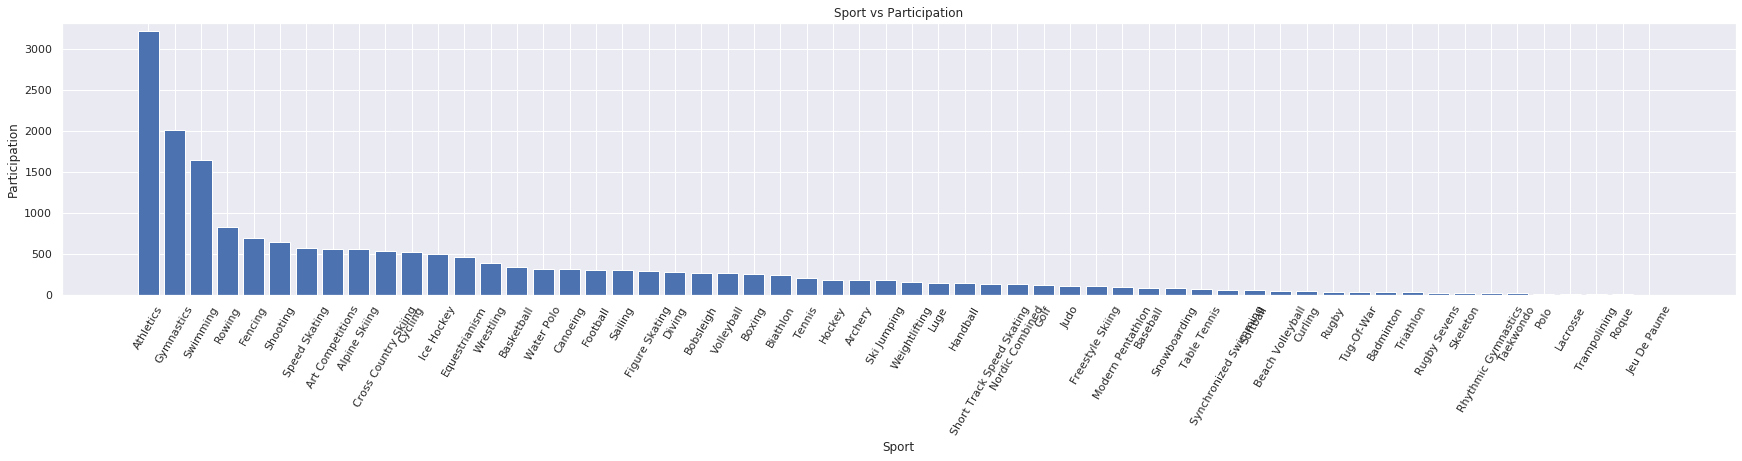

In [13]:
fig = plt.figure(figsize = (30, 5))
plt.xticks(rotation=60)
plt.ylim([0, max(country_sport_count) + 100])
plt.bar(country_sport_count.index, country_sport_count.values)
plt.xlabel('Sport')
plt.ylabel('Participation')
plt.title('Sport vs Participation')
plt.show()

In [14]:
gold_medalists = data_country[data_country['Medal'] == 'Gold'].reset_index(drop=True)
gold_medalists.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
1,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
2,404,"Louis Grenville ""Lou"" Abell",M,15.0,NaN,NaN,Vesper Boat Club,USA,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Eights,Gold
3,404,"Louis Grenville ""Lou"" Abell",M,19.0,NaN,NaN,Vesper Boat Club,USA,1904 Summer,1904,Summer,St. Louis,Rowing,Rowing Men's Coxed Eights,Gold
4,423,Michael Brent Abernathy,M,22.0,182.0,84.0,United States,USA,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Gold


In [15]:
country_gold_sports = gold_medalists['Sport'].unique()
print('The country has won gold in the following sports:\n')
print(country_gold_sports)

The country has won gold in the following sports:

['Golf' 'Basketball' 'Rowing' 'Baseball' 'Athletics' 'Wrestling'
 'Shooting' 'Boxing' 'Swimming' 'Tennis' 'Football' 'Figure Skating'
 'Sailing' 'Softball' 'Equestrianism' 'Snowboarding' 'Weightlifting'
 'Water Polo' 'Alpine Skiing' 'Cycling' 'Synchronized Swimming'
 'Ice Hockey' 'Bobsleigh' 'Volleyball' 'Archery' 'Canoeing' 'Gymnastics'
 'Diving' 'Freestyle Skiing' 'Speed Skating' 'Art Competitions'
 'Beach Volleyball' 'Rugby' 'Nordic Combined' 'Tug-Of-War' 'Skeleton'
 'Jeu De Paume' 'Judo' 'Roque' 'Triathlon' 'Polo' 'Taekwondo'
 'Short Track Speed Skating' 'Fencing']


In [16]:
medalists = data_country.dropna(subset=['Medal']).reset_index()

## Visualize participation vs sport for a country

In [17]:
#Total Medalists in various summer sports
summer_medalists = data_country[data_country['Season'] == "Summer"].dropna(subset=['Medal'])['Sport'].value_counts() 
summer_medalists

Athletics                1080
Swimming                 1078
Rowing                    375
Basketball                341
Gymnastics                194
Shooting                  193
Water Polo                150
Sailing                   140
Diving                    140
Equestrianism             132
Wrestling                 128
Volleyball                120
Boxing                    113
Football                  102
Cycling                    78
Fencing                    69
Baseball                   68
Tennis                     62
Softball                   60
Archery                    57
Weightlifting              42
Golf                       38
Rugby                      36
Synchronized Swimming      30
Hockey                     30
Canoeing                   21
Beach Volleyball           20
Modern Pentathlon          17
Tug-Of-War                 14
Judo                       14
Lacrosse                   12
Polo                       12
Ice Hockey                 11
Art Compet

In [18]:
# Total Medalists in vaious Winter sports
winter_medalists = data_country[data_country['Season'] == "Winter"].dropna(subset=['Medal'])['Sport'].value_counts()
winter_medalists

Ice Hockey                   265
Bobsleigh                     74
Speed Skating                 70
Figure Skating                65
Alpine Skiing                 44
Short Track Speed Skating     42
Snowboarding                  24
Freestyle Skiing              21
Luge                           9
Skeleton                       8
Nordic Combined                7
Curling                        4
Cross Country Skiing           1
Ski Jumping                    1
Name: Sport, dtype: int64

In [19]:
# pd.set_option('display.max_rows', None)
medals_country = data_country.dropna(subset=['Medal'])
medals_country.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
16,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver
20,145,Jeremy Abbott,M,28.0,175.0,70.0,United States,USA,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze
22,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold
24,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver
25,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver


In [20]:
medals_country_count = medals_country['Medal'].value_counts()
print('Total gold silver and bronze medalists')
medals_country_count

Total gold silver and bronze medalists


Gold      2638
Silver    1641
Bronze    1358
Name: Medal, dtype: int64

In [21]:
medals_country_teamcount = medals_country[medals_country['Season'] == 'Summer'].drop_duplicates(subset=['Year', 'Sport', 'Event', 'Medal'], keep='first', inplace=False)['Medal'].value_counts()
print('Total gold silver and bronze medals considering a team wins one medal')
medals_country_count

Total gold silver and bronze medals considering a team wins one medal


Gold      2638
Silver    1641
Bronze    1358
Name: Medal, dtype: int64

In [22]:
temp_data = medals_country.drop_duplicates(subset=['Sport','Event','Games', 'Medal'], keep='first',inplace=False)
medals_country_sport = temp_data_count['Sport'].value_counts()

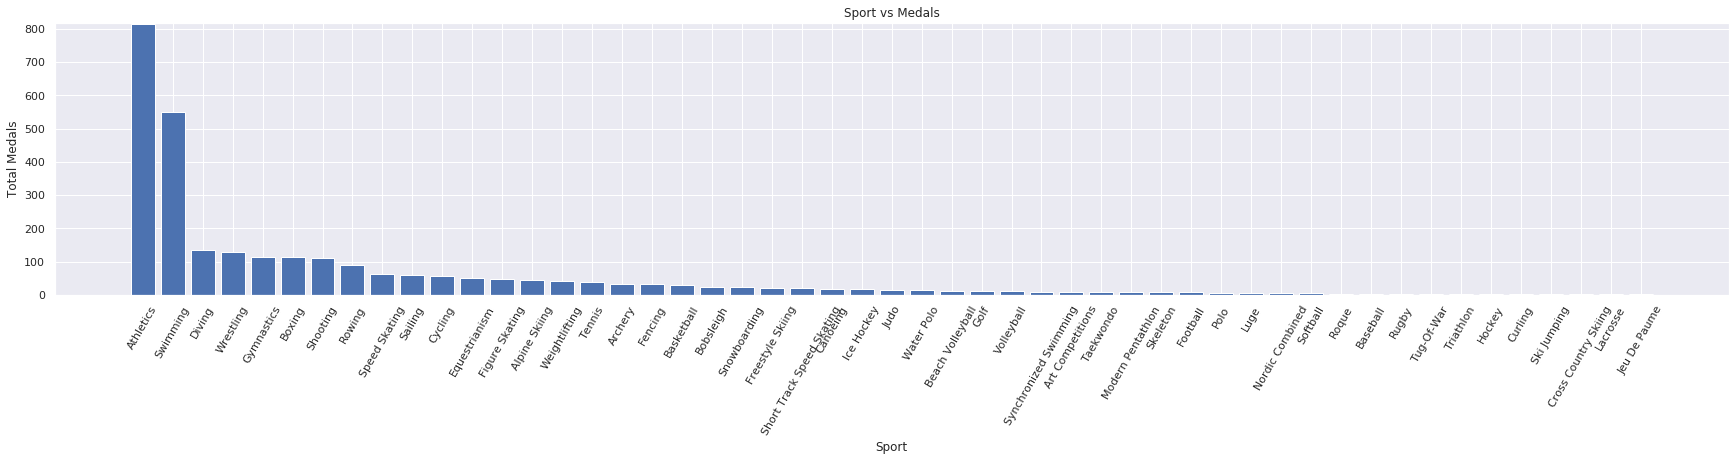

In [23]:
fig = plt.figure(figsize = (30, 5))
plt.xticks(rotation=60)
plt.ylim([0, max(medals_country_sport) + 2])
plt.bar(medals_country_sport.index, medals_country_sport.values)
plt.xlabel('Sport')
plt.ylabel('Total Medals')
plt.title('Sport vs Medals')
plt.show()

## Visualize Medals vs Year

In [24]:
temp_data = medals_country[medals_country['Season'] != 'Winter'].drop_duplicates(subset=['Sport','Event','Games'], keep='first',inplace=False)
medals_count = temp_data['Year'].value_counts()
# medals_count
for i in range(1896, max(data['Year']) + 1, 4):
    if not medals_count.__contains__(i) and not [1916, 1940, 1944].__contains__(i):
        medals_count[i] = 0

# medals_count.sort_index()
# medals_count[2020] = 7
medals_count = medals_count.sort_index()

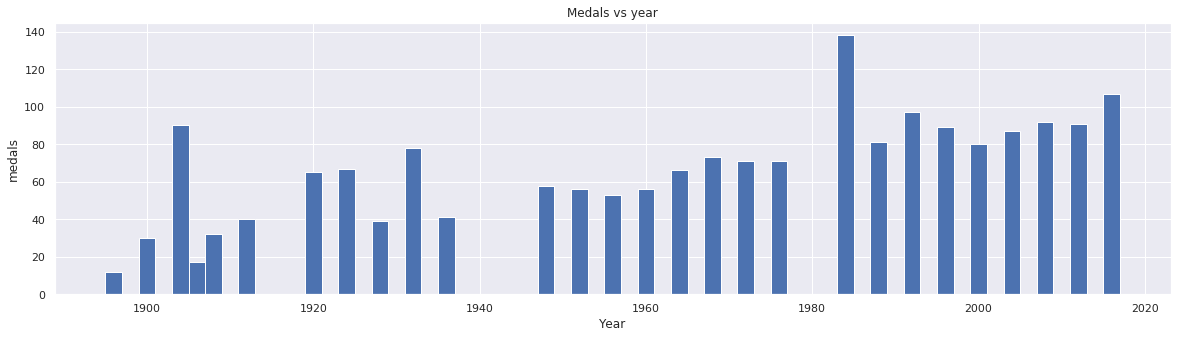

In [25]:
fig = plt.figure(figsize=(20,5))
plt.bar(medals_count.index, medals_count.values, width=2)
plt.xlabel('Year')
plt.ylabel('medals')
plt.title('Medals vs year')
plt.show()

## Machine Learning for Forecasting using Linear model

In [26]:
import sklearn
from sklearn.linear_model import LinearRegression
x = [[item] for item in medals_count.index]
y = [[item] for item in medals_count.values]
reg = LinearRegression().fit(x, y)
(reg.coef_, reg.intercept_)

(array([[0.50638684]]), array([-926.08282284]))

In [27]:
reg.predict([[2020]]), reg.predict([[2024]])

(array([[96.81858638]]), array([[98.84413373]]))

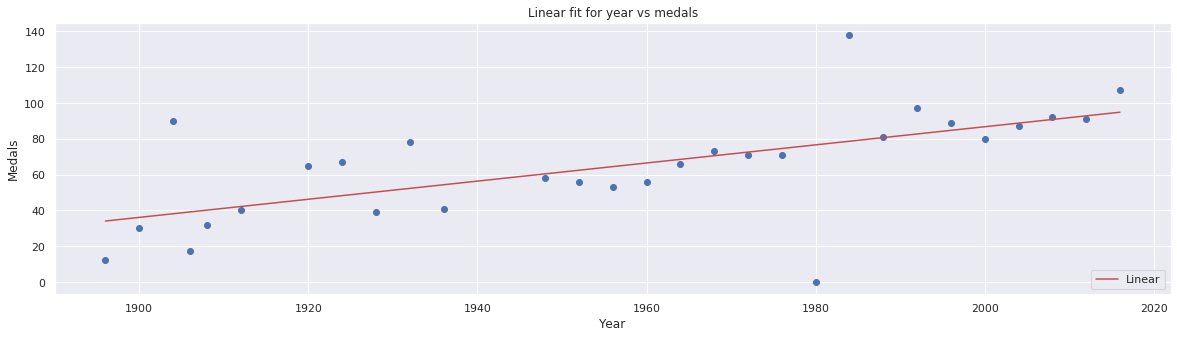

In [28]:
fig = plt.figure(figsize=(20,5))
yhat0 = [ reg.predict([[item]])[0][0] for item in medals_count.index]
plt.scatter(medals_count.index, medals_count.values)
plt.plot(x, yhat0, '-r', label='Linear')
plt.xlabel('Year')
plt.ylabel('Medals')
plt.title('Linear fit for year vs medals')
plt.legend(loc='lower right')
plt.show()

## Machine Learning for Forecasting using non linear model

In [29]:
import sklearn
import math
from sklearn.svm import SVR
x = [[item] for item in medals_count.index]
y = [ item for item in medals_count.values]
svr_poly = SVR(kernel='linear', C=2, gamma='auto', degree=2, epsilon=.01)
model = svr_poly.fit(x, y)

In [30]:
model.predict([[2020]])

array([98.99])

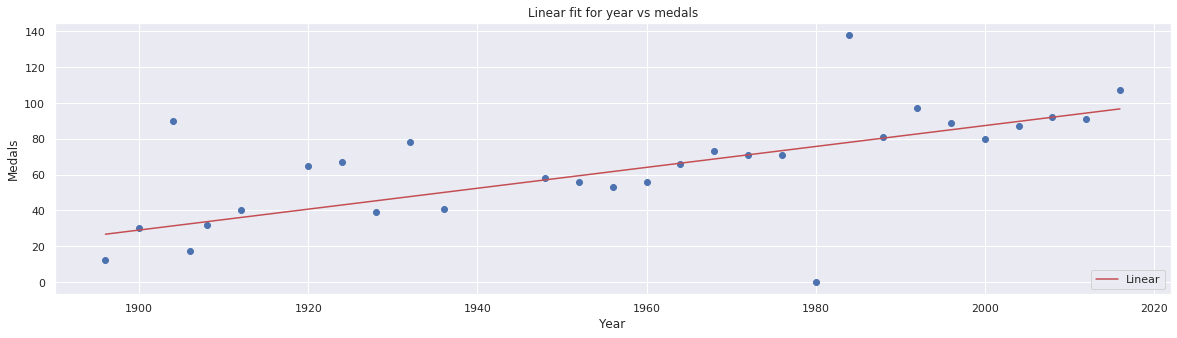

In [31]:
fig = plt.figure(figsize=(20,5))
yhat = [ model.predict([[item]]) for item in medals_count.index]
plt.scatter(medals_count.index, y)
plt.xlabel('Year')
plt.ylabel('Medals')
plt.title('Linear fit for year vs medals')
plt.plot(x, yhat, '-r', label='Linear')
plt.legend(loc='lower right')


## Visualize average heights and weights for various sports

In [32]:
cleaned_data = data.dropna(subset=['Height', 'Weight'])

In [33]:
sport = all_sports.copy()
mean_height = []
mean_weight = []
for s in sport:
    mean_height.append(cleaned_data[cleaned_data['Sport'] == s]['Height'].mean())
    mean_weight.append(cleaned_data[cleaned_data['Sport'] == s]['Weight'].mean())
y0, x0 = zip(*sorted(zip(mean_height, sport)))
y1, x1 = zip(*sorted(zip(mean_weight, sport)))

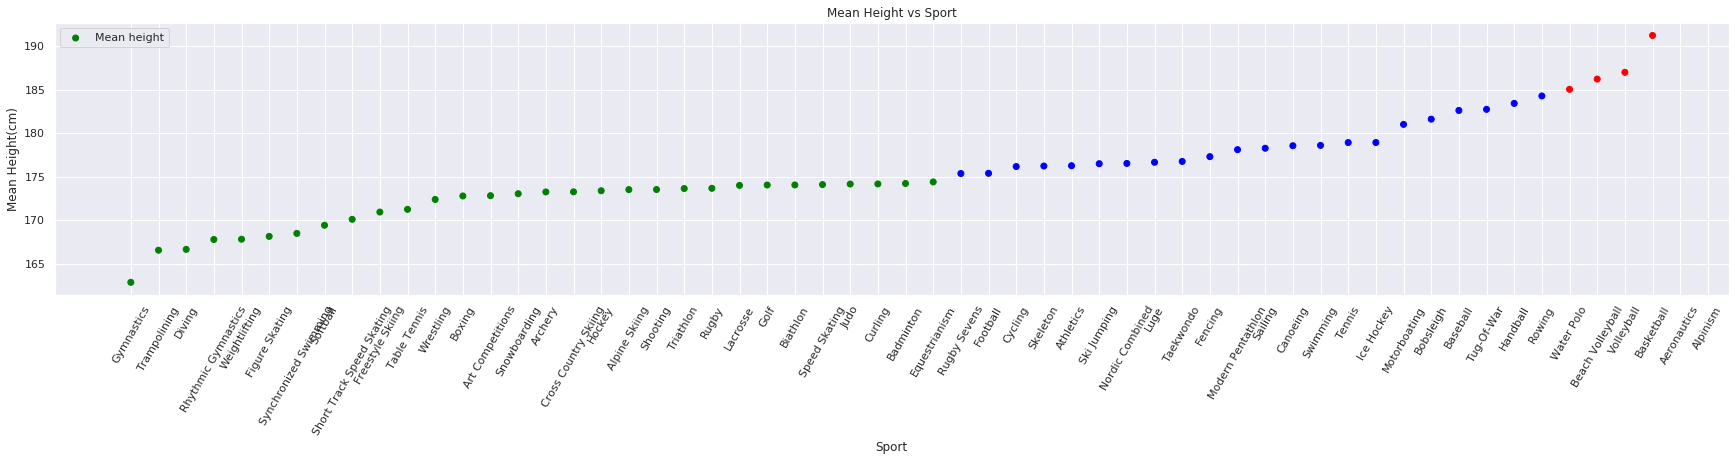

In [34]:
c = []
for m in y0:
    if m <= 175:
        c.append('green')
    elif m <= 185:
        c.append('blue')
    else:
        c.append('red')
fig = plt.figure(figsize=(30,5))
plt.scatter(x0, y0,label='Mean height', color=c)
plt.xlabel('Sport')
plt.xticks(rotation=60)
plt.ylabel('Mean Height(cm)')
plt.title('Mean Height vs Sport')
plt.legend()
plt.show()

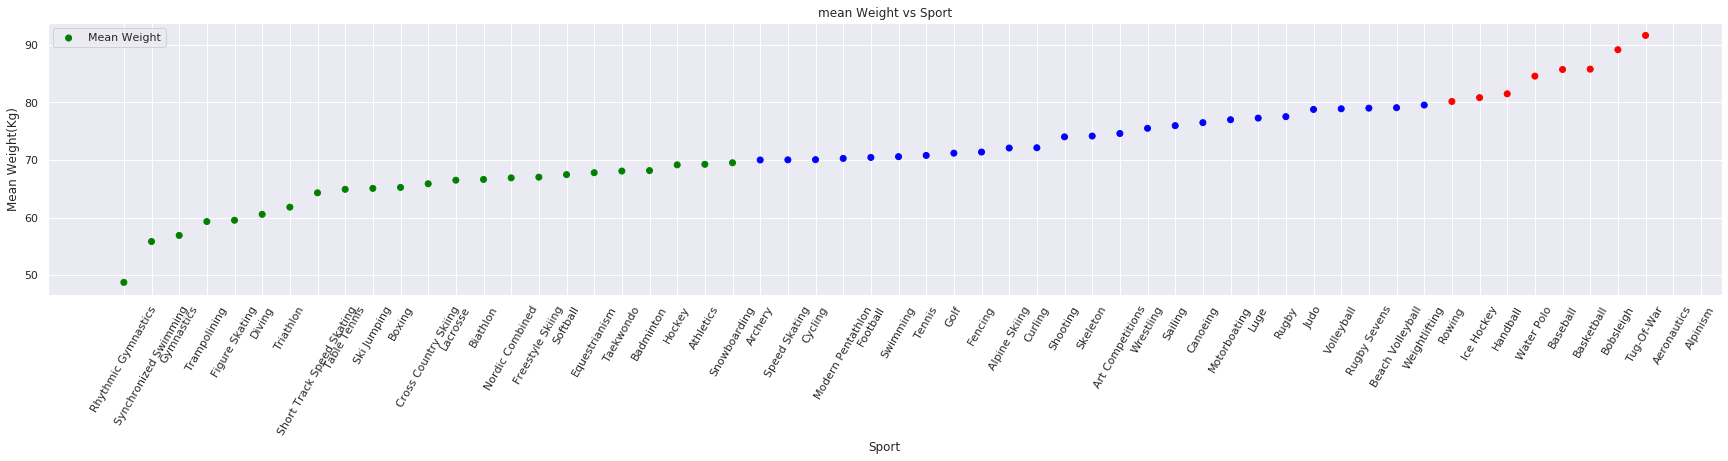

In [35]:
fig = plt.figure(figsize=(30,5))
c = []
for m in y1:
    if m <= 70:
        c.append('green')
    elif m <= 80:
        c.append('blue')
    else:
        c.append('red')
plt.scatter(x1, y1,label='Mean Weight',color=c)
plt.xlabel('Sport')
plt.xticks(rotation=60)
plt.ylabel('Mean Weight(Kg)')
plt.title('mean Weight vs Sport')
plt.legend()
plt.show()